In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [61]:
test = pd.read_csv("test_from_R.csv")
train = pd.read_csv("train_from_R.csv")

train['season'] = train.season.astype('category')
train['holiday'] = train.holiday.astype('category')
train['workingday'] = train.workingday.astype('category')
train['weather'] = train.weather.astype('category')



test['season'] = test.season.astype('category')
test['holiday'] = test.holiday.astype('category')
test['workingday'] = test.workingday.astype('category')
test['weather'] = test.weather.astype('category')

In [62]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,3,0,1,1,26.24,31.060,47.0,12.9980,298
1,1,0,1,1,18.04,21.970,62.0,32.9975,132
2,2,0,1,2,22.96,26.515,64.0,31.0009,92
3,1,0,1,2,12.30,15.150,42.0,8.9981,176
4,1,0,1,1,13.94,14.395,39.0,31.0009,159
...,...,...,...,...,...,...,...,...,...
1962,1,0,1,2,8.20,11.365,59.0,6.0032,52
1963,3,0,1,3,22.96,26.515,94.0,0.0000,22
1964,3,1,0,1,30.34,34.850,70.0,11.0014,357
1965,1,0,0,2,18.86,22.725,72.0,19.9995,94


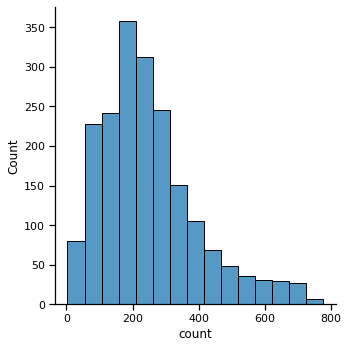

In [63]:
sns.set_context("notebook")
sns.displot(x="count",data=train,kind="hist",bins=15)

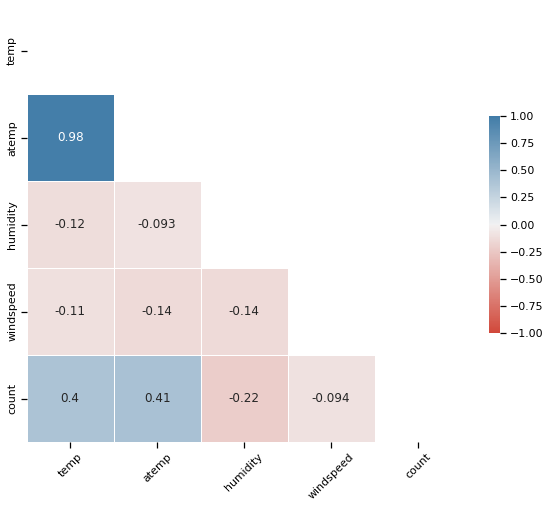

In [64]:
df_numeric = train[["temp","atemp","humidity","windspeed","count"]]
corr = df_numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(15,240,as_cmap=True)
plot=sns.heatmap(corr,mask=mask,vmax=1,vmin=-1,center=0,cmap=cmap,square=True,cbar_kws={"shrink":.5},
            linewidth=1,ax=ax,annot=True)
plot.tick_params(axis='x', rotation=45)

C:\Users\dovyd\AppData\Local\Temp/ipykernel_3356/930656339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["count"] = np.log(df_numeric["count"])


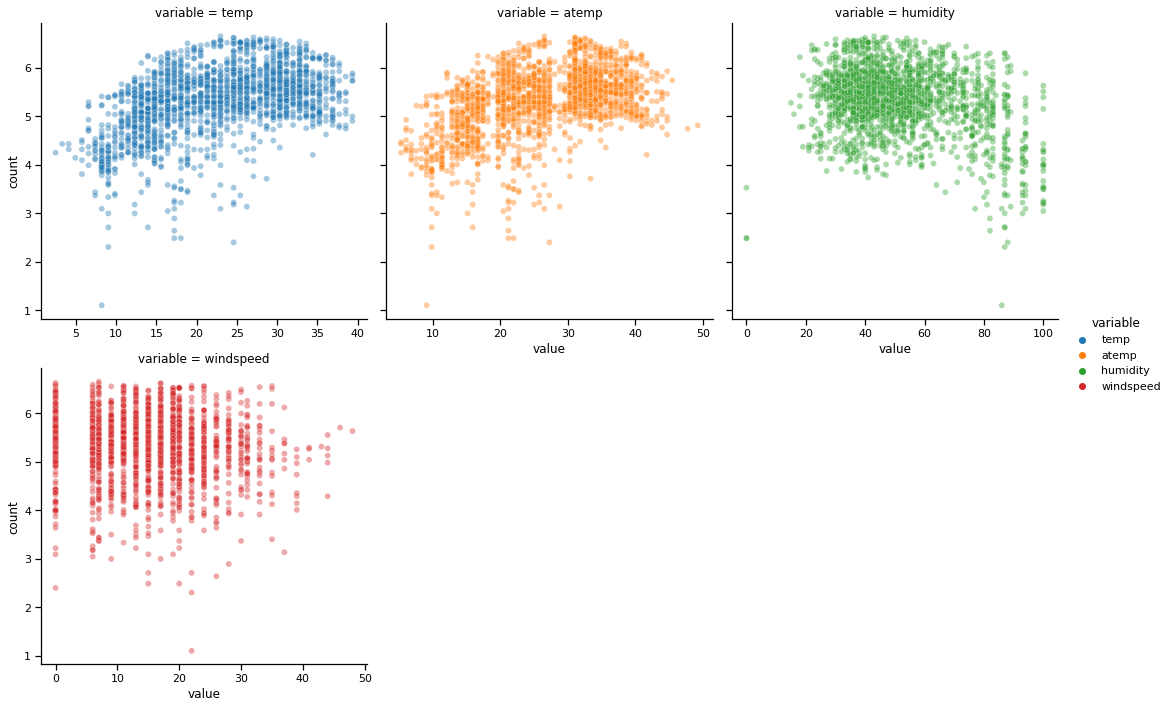

In [65]:
df_numeric = train[["temp","atemp","humidity","windspeed","count"]]
df_numeric["count"] = np.log(df_numeric["count"])
df_long = df_numeric.melt("count")
            
sns.relplot(x="value",y="count",data=df_long,col="variable",hue="variable",
            alpha=0.4,kind="scatter",col_wrap=3,facet_kws={'sharex': False})

In [94]:
train = train.drop("temp",axis=1)
test = test.drop("temp",axis=1)

C:\Users\dovyd\AppData\Local\Temp/ipykernel_4244/2834797019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical["count"] = np.log(df_categorical["count"])
C:\Users\dovyd\anaconda3\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


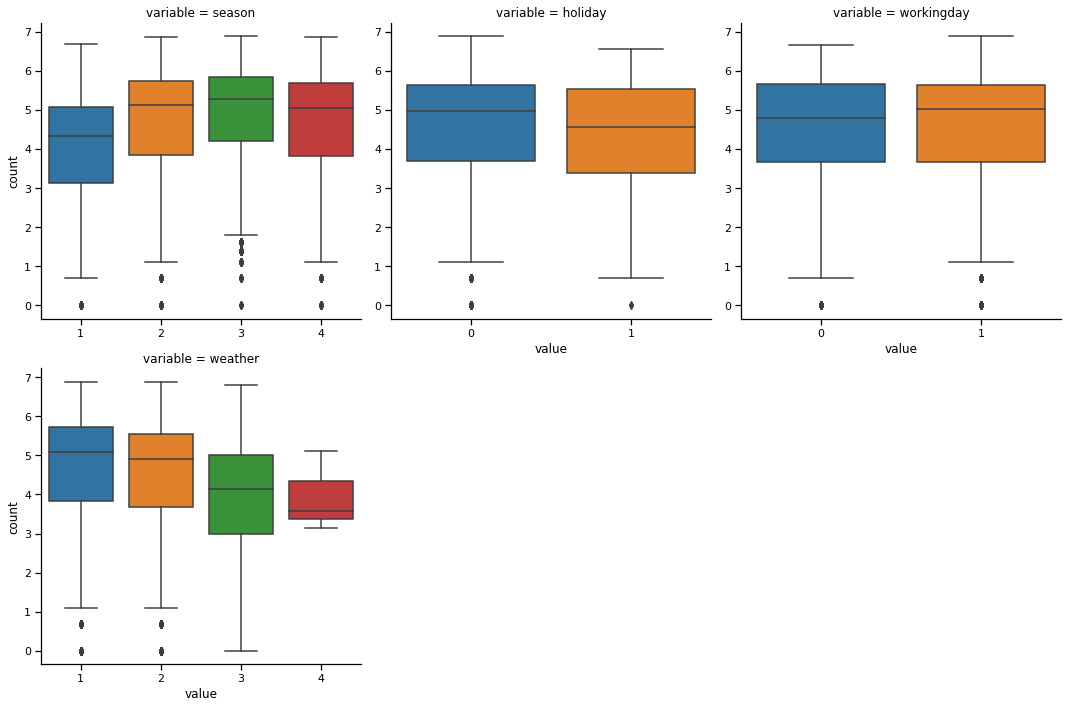

In [377]:
df_categorical = train[["season","holiday","workingday","weather","count"]]
df_categorical["count"] = np.log(df_categorical["count"])
df_long = df_categorical.melt("count")
            
sns.catplot(x="value",y="count",data=df_long,col="variable",kind="box",col_wrap=3,sharey=False,sharex=False)

In [68]:
import patsy

y, X = patsy.dmatrices('count ~ season + holiday + workingday + weather + atemp + humidity + windspeed',
                       data=train, return_type='dataframe')

y_test, X_test = patsy.dmatrices('count ~ season + holiday + workingday + weather + atemp + humidity + windspeed',
                       data=test, return_type='dataframe')

In [110]:
model_1=sm.GLM(y,X,family=sm.families.Poisson())
res_1=model_1.fit()
dispersion = res_1.deviance / res_1.df_resid
print(dispersion)

31.465046674784354


In [111]:
model_2=sm.GLM(y,X,family=sm.families.Poisson(),var_weights=np.repeat(1/dispersion,len(y)))
res_2=model_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  count   No. Observations:                 1967
Model:                            GLM   Df Residuals:                     1956
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1201.7
Date:                Sun, 27 Mar 2022   Deviance:                       1956.0
Time:                        18:29:20   Pearson chi2:                 1.97e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.3809      0.049    109.911      0.000       5.285       5.477
season[T.2]         0.3602      0.032     11.281      0.000       0.298       0.423
season[T.3]         0.2554      0.039      6.611      0.000       0.180       0.331
season[T.4]         0.4591      0.028     16.299      0.000       0.404       0.514
holiday[T.1]       -0.2803      0.045     -6.273      0.000      -0.368      -0.193
workingday[T.1]    -0.6730      0.017    -40.451      0.000      -0.706      -0.640
weather[T.2]       -0.0113      0.021     -0.530      0.596      -0.053       0.031
weather[T.3]       -0.5133      0.048    -10.741      0.000      -0.607      -0.420
atemp               0.0219      0.002     14.093      0.000       0.019       0.025
humidity           -0.0047      0.001     -7.749      0.000      -0.006      -0.004
windspeed          -0.0040      0.001     -4.187      0.000      -0.006      -0.002
===================================================================================
"""

C:\Users\dovyd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Pearson residuals')

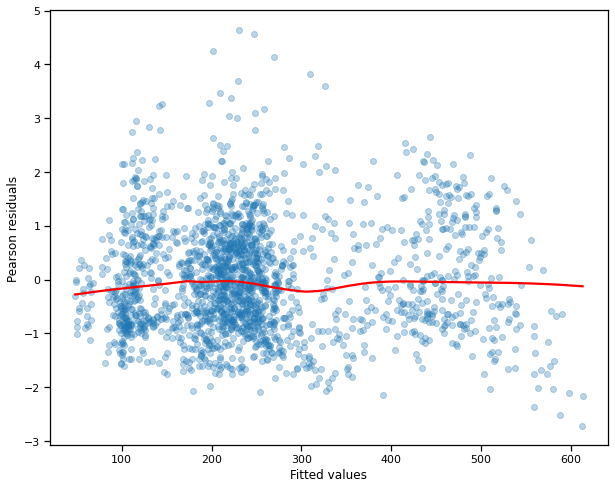

In [112]:
fig, ax = plt.subplots(1,1,figsize=(10, 8))
ax = sns.regplot(res_2.mu,res_2.resid_pearson,ax=ax,scatter_kws={"alpha":0.3},line_kws={"color":"red"},lowess=True)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Pearson residuals")

In [118]:
np.exp(res_2.params[1:])

season[T.2]        1.433610
season[T.3]        1.290946
season[T.4]        1.582585
holiday[T.1]       0.755590
workingday[T.1]    0.510199
weather[T.2]       0.988730
weather[T.3]       0.598526
atemp              1.022165
humidity           0.995293
windspeed          0.996019
dtype: float64

Text(0.5, 0.98, 'Negative binomial model')

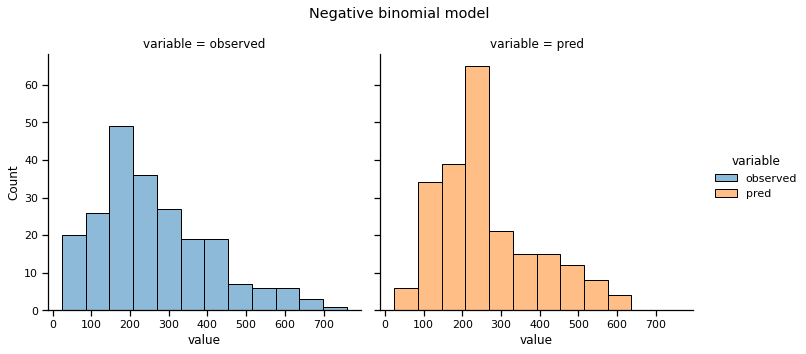

In [121]:
results = pd.DataFrame({"observed":test["count"],"pred":res_2.predict(X_test)})
ax = sns.displot(x="value",col="variable",hue="variable",data=results.melt(),bins=12)
ax.fig.subplots_adjust(top=0.85) 
ax.fig.suptitle("Negative binomial model")

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE:",np.sqrt(mean_squared_error(results["observed"],results["pred"])))

print("MAE:",mean_absolute_error(results["observed"],results["pred"]))

RMSE: 98.58656131186578
MAE: 75.97191351567918
